In [1]:
import pandas as pd

In [18]:
df = pd.read_csv("/content/Bengaluru_house_pricedata.csv")

In [19]:
df.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df.shape

(7120, 108)

In [21]:
#EDA

In [22]:
print(df.describe())


              bath      balcony        price  total_sqft_int          bhk  \
count  7120.000000  7120.000000  7120.000000     7120.000000  7120.000000   
mean      2.390871     1.572759    96.454991     1479.729806     2.465169   
std       0.876822     0.770583   116.185034      913.779769     0.841520   
min       1.000000     0.000000    10.000000      350.000000     1.000000   
25%       2.000000     1.000000    49.230000     1100.000000     2.000000   
50%       2.000000     2.000000    69.000000     1255.000000     2.000000   
75%       3.000000     2.000000   104.000000     1640.250000     3.000000   
max       9.000000     3.000000  2912.000000    30400.000000     9.000000   

       price_per_sqft  area_typeSuper built-up  Area  area_typeBuilt-up  Area  \
count     7120.000000                    7120.000000              7120.000000   
mean      5923.806855                       0.750702                 0.182303   
std       2556.650935                       0.432637           

In [23]:
## Checking Null Values
df.isnull().sum()

bath                           0
balcony                        0
price                          0
total_sqft_int                 0
bhk                            0
                              ..
location_Hosur Road            0
location_Horamavu Banaswadi    0
location_Domlur                0
location_Mahadevpura           0
location_Tumkur Road           0
Length: 108, dtype: int64

<ipython-input-24-a5a4778658a1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], bins=30)


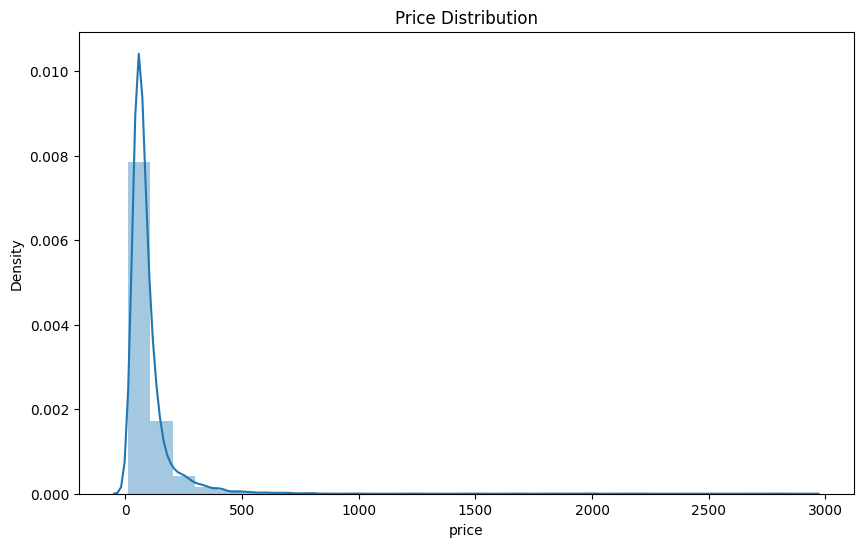

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.distplot(df['price'], bins=30)
plt.title('Price Distribution')
plt.show()


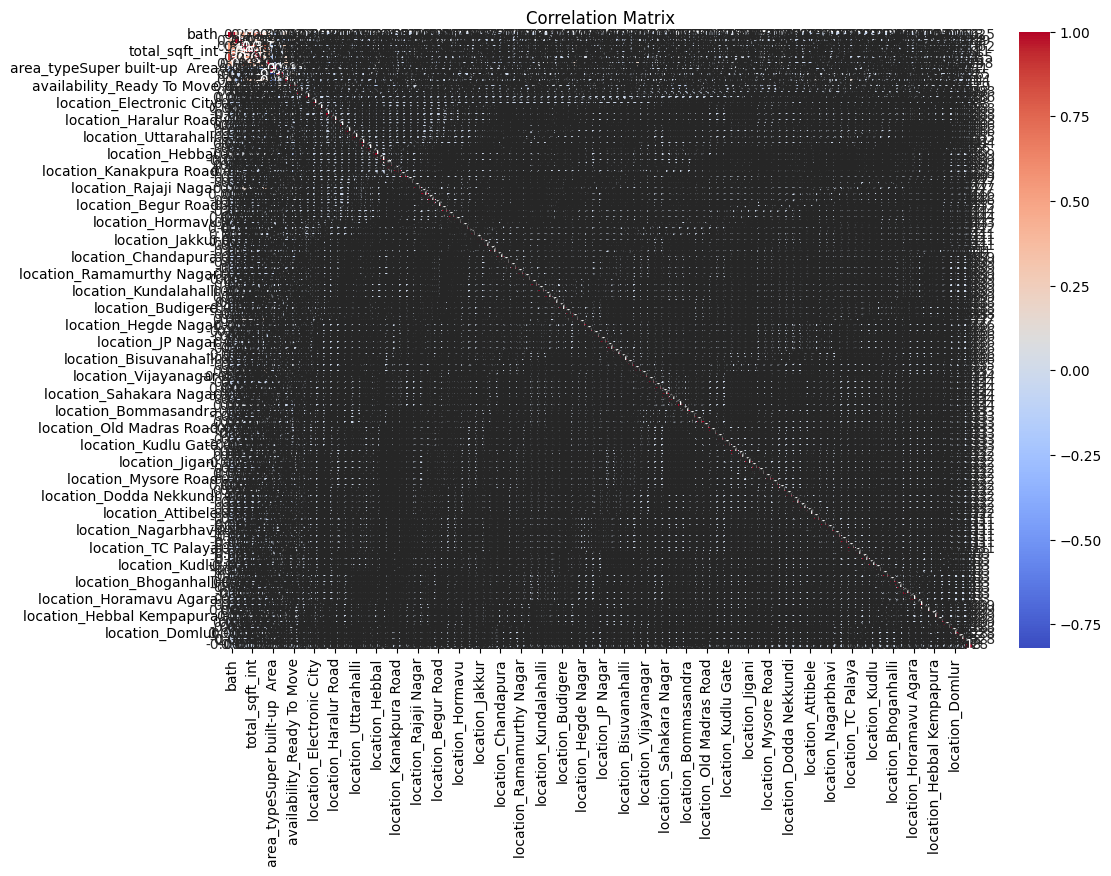

In [25]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [27]:
df.isnull().sum()

bath                           0
balcony                        0
price                          0
total_sqft_int                 0
bhk                            0
                              ..
location_Hosur Road            0
location_Horamavu Banaswadi    0
location_Domlur                0
location_Mahadevpura           0
location_Tumkur Road           0
Length: 108, dtype: int64

In [28]:
df.columns

Index(['bath', 'balcony', 'price', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move',
       ...
       'location_Kalena Agrahara', 'location_Horamavu Agara',
       'location_Vidyaranyapura', 'location_BTM 2nd Stage',
       'location_Hebbal Kempapura', 'location_Hosur Road',
       'location_Horamavu Banaswadi', 'location_Domlur',
       'location_Mahadevpura', 'location_Tumkur Road'],
      dtype='object', length=108)

In [29]:
#Splitting Data
X = df.drop('price', axis = 1)
y = df['price']

X.shape, y.shape

((7120, 107), (7120,))

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 99)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((5696, 107), (1424, 107), (5696,), (1424,))

In [31]:
#Feature scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# sc.fit(X_train)
#X_train = sc.transform(X_train)

X_train = sc.fit_transform(X_train)

X_valid = sc.transform(X_valid)

In [32]:
#Model building
from sklearn.svm import SVR
model_svr_default = SVR()
model_svr_default.fit(X_train, y_train)

model_svr_default.score(X_valid, y_valid)

0.31547775046465865

In [33]:
model_svr_lr = SVR(kernel = 'linear')
model_svr_lr.fit(X_train, y_train)

model_svr_lr.score(X_valid, y_valid)

0.8111436114065342

In [34]:
model_svr_pl3d = SVR(kernel = 'poly') # With polynomial, we have to use degree, and the default is 3.
model_svr_pl3d.fit(X_train, y_train)

model_svr_pl3d.score(X_valid, y_valid)

0.1116018528565893

In [35]:
model_svr_pl2d = SVR(kernel = 'poly', degree = 2)
model_svr_pl2d.fit(X_train, y_train)

model_svr_pl2d.score(X_valid, y_valid)

0.09614273730832423

In [36]:
#predict
X_valid[0]

array([-0.44305711, -0.74358193, -0.3012319 , -0.54957475,  0.36934542,
        0.57870175, -0.47622791, -0.2546997 ,  0.51526358, -0.18424021,
       -0.15815656, -0.15222439, -0.12381344, -0.12598816, -0.12953656,
       -0.12454231, -0.12526719, -0.12670528, -0.12381344, -0.12010681,
       -0.10992018, -0.1082724 , -0.11472827, -0.10992018, -0.09691319,
       -0.08721571, -0.08823182, -0.08514823, -0.09023078, -0.08721571,
       -0.0830308 , -0.08514823, -0.08195215, -0.07633675, -0.07975227,
       -0.07633675, -0.07975227, -0.0739743 , -0.0739743 , -0.0677166 ,
       -0.07028523, -0.07153563, -0.07749158, -0.07749158, -0.07276497,
       -0.07153563, -0.0739743 , -0.07633675, -0.07028523, -0.07276497,
       -0.07028523, -0.06639573, -0.06367332, -0.0677166 , -0.06639573,
       -0.06901264, -0.0677166 , -0.06504853, -0.06639573, -0.06083125,
       -0.06504853, -0.06367332, -0.06367332, -0.05785186, -0.06504853,
       -0.06504853, -0.05785186, -0.06226825, -0.05935999, -0.06

In [37]:
model_svr_lr.predict([X_valid[0]])

array([84.33821579])

In [38]:
y_valid.iloc[0]

82.0

In [39]:
print("Predicted Price is {} and the actual price is {}".format(model_svr_lr.predict([X_valid[0]]), y_valid.iloc[0]))

Predicted Price is [84.33821579] and the actual price is 82.0


In [40]:
y_pred = model_svr_lr.predict(X_valid)

In [41]:
#Metrics
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_valid, y_pred)
rmse = np.sqrt(mse)

print('MSE = ', mse)
print('RMSE = ', rmse)

MSE =  2166.2988629657125
RMSE =  46.54351579936471
